In [6]:
import pandas as pd
import ioutils as io
import matplotlib.pyplot as plt
import numpy as np

./data/Unlabelled/sensors/138.csv
points = 1152000
duration = 57599.95 seconds


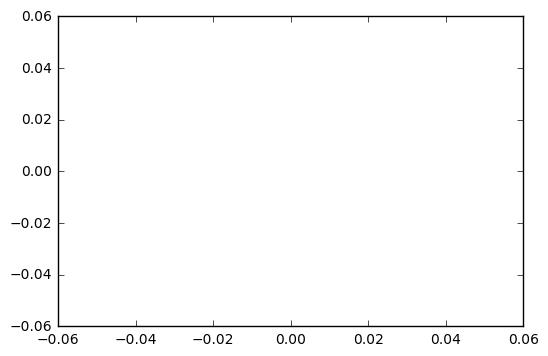

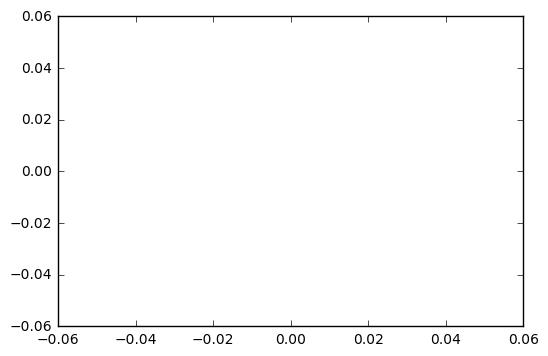

highest correlation = 0
average duration = 57599.95


In [47]:
# id to examine
import itertools

action_id = 1
full_file_paths = io.get_filepaths("./data/Unlabelled/sensors/")[:1] #+ str(action_id))

avg_duration = 0
samples = len(full_file_paths)
time_series = []
for filepath in full_file_paths:
    frame = pd.read_csv(filepath)
    print(filepath)
    size = frame.shape[0]
    print('points = ' + str(size))
    duration = (frame.iloc[size-1,0] - frame.iloc[0,0])
    avg_duration += duration
    print('duration = ' + str(duration) + ' seconds')
    plt.figure()
    plt.plot(frame.iloc[:,0], frame.iloc[:,1])
    #plt.plot(frame.iloc[:,0], frame.iloc[:,2])
    #plt.plot(frame.iloc[:,0], frame.iloc[:,3])
    #plt.plot(frame.iloc[:,0], frame.iloc[:,4])
    #plt.plot(frame.iloc[:,0], frame.iloc[:,5])
    #plt.plot(frame.iloc[:,0], frame.iloc[:,6])
    #plt.plot(frame.iloc[:,0], frame.iloc[:,7])
    def fft_discard(x):
        xt = np.fft.fft(x)
        pos = len(xt)*1//20
        xt[pos:] = 0
        return np.abs(np.fft.ifft(xt))
    #plt.ylim((0.5,1))
    #plt.plot(frame.iloc[:,0], fft_discard(frame.iloc[:,1:9].pow(2).sum(1).pow(0.5)))
    #plt.plot(frame.iloc[:,0], fft_discard(frame.iloc[:,4:6].pow(2).sum(1).pow(0.5)))
    #plt.plot(frame.iloc[:,0], fft_discard(frame.iloc[:,7:9].pow(2).sum(1).pow(0.5)))
    #plt.plot(frame.iloc[:,0], fft_discard(frame.iloc[:,8]))
    #plt.plot(frame.iloc[:,0], fft_discard(frame.iloc[:,9]))
    #time_series.append(frame.iloc[:,9])
    plt.show()

corr = 0
for pair in itertools.combinations(time_series,2):
    series1 = pair[0]
    series2 = pair[1]
    cross_v = np.correlate(series1,series2,'full')
    #print(cross_v)
    corr = max(corr, cross_v.max())
print('highest correlation = ' + str(corr))
print('average duration = ' + str(avg_duration / samples))